In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import cv2
import imutils
from PIL import Image
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image = cv2.imread('/content/drive/MyDrive/erth.jpg')

In [ ]:
image.shape

(1308, 736, 3)

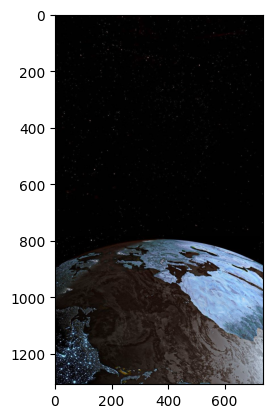

In [ ]:
plt.imshow(image)

# **Image Rotation 1**
### by imutils library

In [ ]:
def Rotate(image,angle):
  Rotated_image = imutils.rotate(image,angle=angle)
  plt.imshow(Rotated_image)

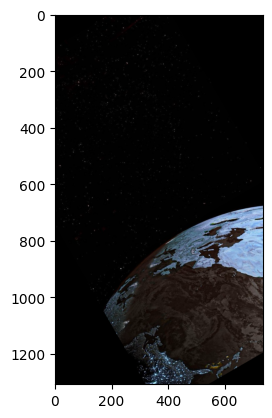

In [ ]:
Rotate(image,30)

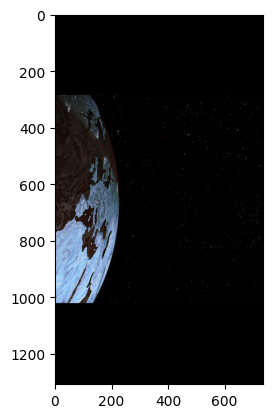

In [ ]:
Rotate(image,-90)

# **Image Rotation 2**
### by rotation matrix: in this solution, we find the center of image and then rotate it as much as we want and show it by warpAffine function.

In [ ]:
def Rotate2(image,angle):
  height, width = image.shape[:2]
  center = (width/2, height/2)
  rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=1)
  rotated_image = cv2.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))
  plt.imshow(rotated_image)

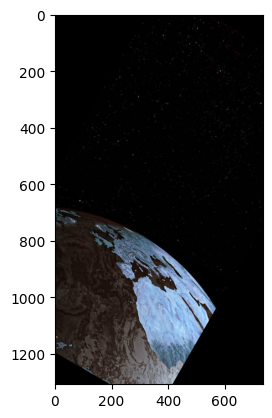

In [ ]:
Rotate2(image,-30)

# **Image Cropping**

In [ ]:
def Cropped(image,x1,x2,y1,y2):
  cropped = image[x1:x2,y1:y2]
  plt.imshow(cropped)

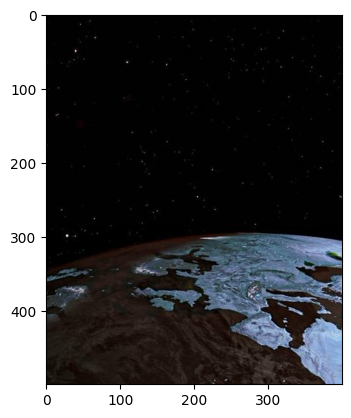

In [ ]:
Cropped(image,500,1000,100,500)

# **Affine Transformation**

### these tasks done by Translation Matrix




In [ ]:
def Translation(image,shift_horizental,shift_vertical):
  height, width = image.shape[:2]
  M = np.float32([[1,0,shift_horizental],
                [0,1,shift_vertical]])

  shifted = cv2.warpAffine(image,M,(width,height))
  plt.imshow(shifted)

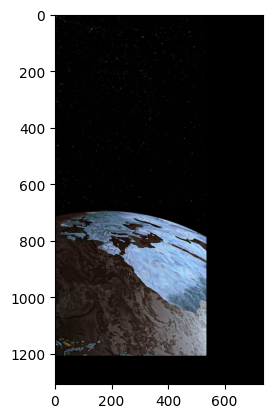

In [ ]:
Translation(image,-200,-100)

In [ ]:
def Scaling(image,width,height):
  Scalled = cv2.resize(image,(width,height))
  plt.imshow(Scalled)

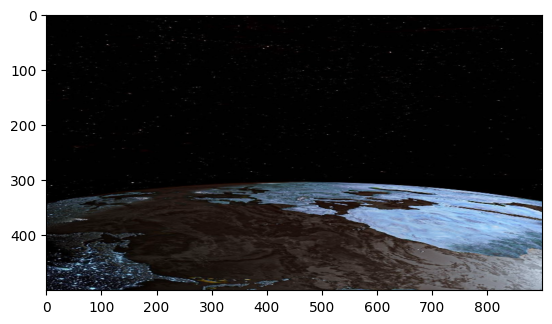

In [ ]:
Scaling(image,900,500)

In [ ]:
image = cv2.imread('/content/drive/MyDrive/erth.jpg')

In [ ]:
def Scaling2(image,scale_x,scale_y):
  height, width = image.shape[:2]
  M = np.float32([[scale_x,0,0],
                [0,scale_y,1]])

  scalled = cv2.warpAffine(image,M,(width,height))
  plt.imshow(scalled)

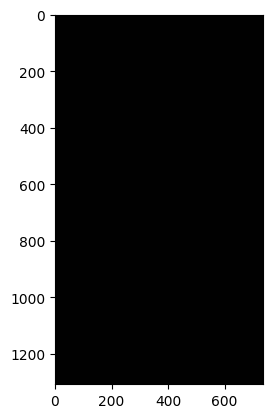

In [ ]:
Scaling2(image,900,500)

In [ ]:
def Shearing(image,x,y):
  (rows, cols) = image.shape[:2]
  M = np.float32([[1, x, 0], [y, 1, 0], [0, 0, 1]])
  sheared_img = cv2.warpPerspective(image, M, (int(cols*1.5), int(rows*1.5)))
  plt.imshow(sheared_img)

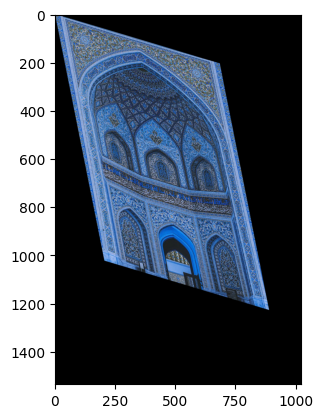

In [ ]:
image2 = cv2.imread('/content/drive/MyDrive/down2.jpg')
Shearing(image2,0.2,0.3)

In [ ]:
def Reflecting(image,x,y):
  (rows, cols) = image.shape[:2]
  M = np.float32([[1,  0, 0],
                [0, x, rows],
                [0,  0, 1]])
  reflected_img = cv2.warpPerspective(image, M,
                                   (int(cols),
                                    int(rows)))
  plt.imshow(reflected_img)

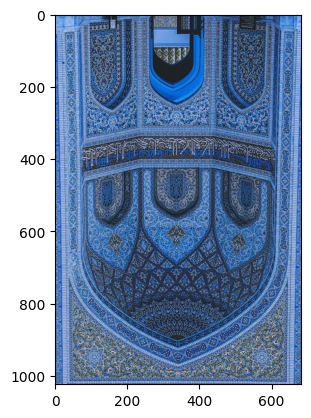

In [ ]:
Reflecting(image2,-1,1)

# **Perspective Transformation**

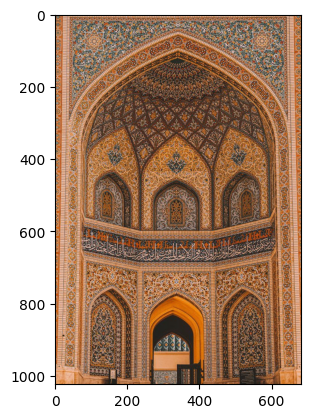

In [ ]:
img_copy = np.copy(image2)
img_copy = cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)
plt.imshow(img_copy)

In [ ]:
img_copy.shape

(1024, 683, 3)

### Perspective Transform is a feature that is very useful if you want to align the image properly . It transform the image in a straight manner after Perspective Transformation is applied to it.

In [ ]:
from operator import itemgetter
from glob import glob

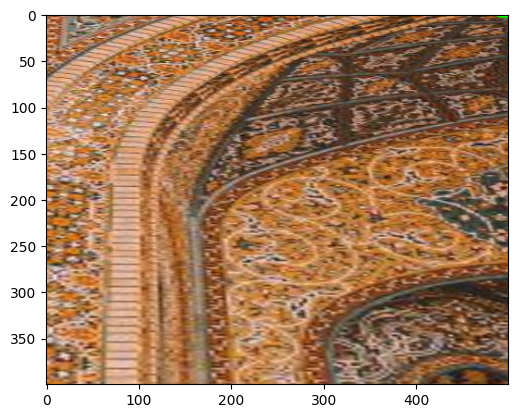

In [ ]:
pts1 = np.float32([[40,209],[200,200],[50,500],[150,500]])
pts2 = np.float32([[0,0],[500,0],[0,400],[500,400]])


for val in pts1:
    cv2.circle(img_copy,(int(pts1[1][0]),int(pts1[1][1])),5,(0,255,0),-1)
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img_copy,M,(500,400))
plt.imshow(dst)

# **Color Indexing**

In [ ]:
bubbles_image = cv2.imread('/content/drive/MyDrive/bubbles.png')

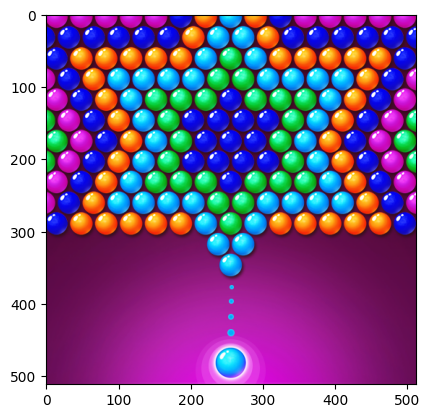

In [ ]:
plt.imshow(bubbles_image)

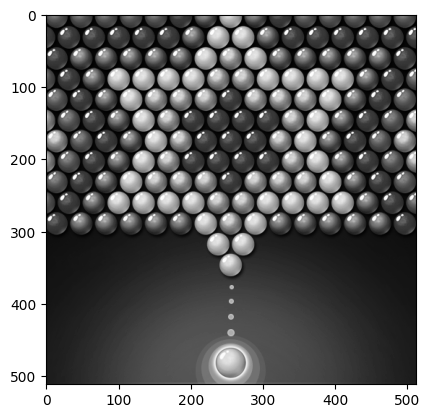

In [ ]:
bubbles_image_gray = cv2.cvtColor(bubbles_image, cv2.COLOR_BGR2GRAY)
plt.imshow(bubbles_image_gray,cmap='gray')

### The first step is to extract all bubbles from the background. For that, we will first convert the image to grayscale with cv2.cvtColor() function, and then use cv2.threshold() to convert it to a binary image. Since some of the bubbles are slightly overlapped on the binary image, we use the cv2.erode() function to separate them.

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
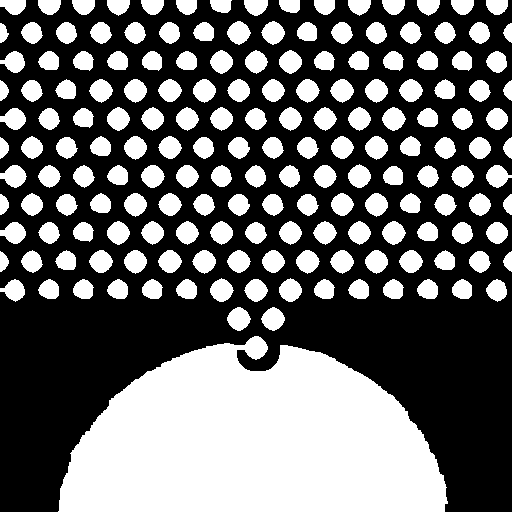

In [ ]:
threshold , mask = cv2.threshold(bubbles_image_gray,60,255,cv2.THRESH_BINARY)
mask = cv2.erode(mask,np.ones((8,8),np.uint8))
mask

### The next step is to find objects in the binary image. We use the cv2.findContours() function on the binary image to detect the objects' borders. A contour is defined as a continuous curve that forms the boundary of an object in an image. When the cv2.RETR_EXTERNAL flag is used, only the outermost contours are returned. The algorithm outputs a list of contours, each of which represents the boundary of a single object in the image.

(-0.5, 511.5, 511.5, -0.5)

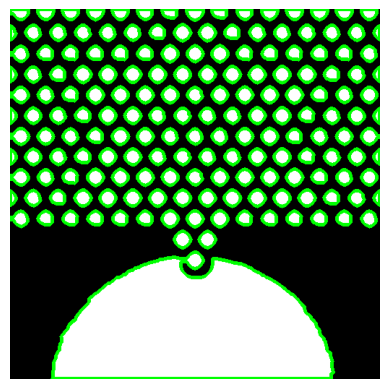

In [ ]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours_img_before_filtering = mask.copy()
contours_img_before_filtering = cv2.cvtColor(contours_img_before_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_before_filtering, contours, -1, (0, 255, 0), 3)
plt.imshow(contours_img_before_filtering)
plt.axis('off')


### 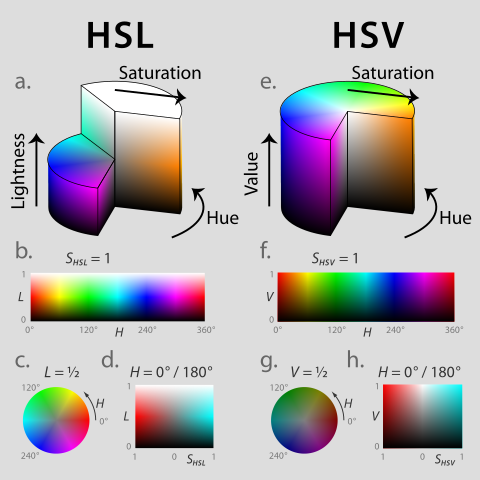To remove contours that do not represent bubbles, we will iterate over the resulting contours and select only those with a large area (greater than 3000 pixels). This will allow us to isolate the contours of the bubbles and discard
 any smaller objects, such as letters or parts of the background

### To find the mean color of each bubble, we will first create a mask for each bubble by drawing its contours in white on a black image. Then, we will use the cv2.mean() function to calculate the bubble’s mean Blue, Green, and Red (BGR) channels values using the original image and the bubble’s mask. The mean BGR values of each bubble are stored in a pandas DataFrame.

In [ ]:
filtered_contours = []
df_mean_color = pd.DataFrame()

for idx, contour in enumerate(contours):
  area = int(cv2.contourArea(contour))
  if area > 50:
    filtered_contours.append(contour)
    masked = np.zeros_like(bubbles_image[:,:,0])
    cv2.drawContours(masked,[contour],0,255,-1)

    B_mean, G_mean, R_mean, _ = cv2.mean(bubbles_image, mask=masked)
    df = pd.DataFrame({'B_mean': B_mean, 'G_mean': G_mean, 'R_mean': R_mean}, index=[idx])
    df_mean_color = pd.concat([df_mean_color, df])

df_mean_color.head()


,B_mean,G_mean,R_mean
0,166.738807,37.749637,164.492584
1,25.078481,199.296203,253.600000
2,26.334165,199.431421,253.521197
3,16.814159,19.315634,233.601770
4,252.873016,154.123810,29.485714


### Finally, we will apply the K-means clustering algorithm to group together bubbles with similar colors. We will use the mean color values of the contours as the input data for the KMeans algorithm from the sklearn library. The n_clusters hyperparameter specifies the number of clusters to be created by the algorithm

True

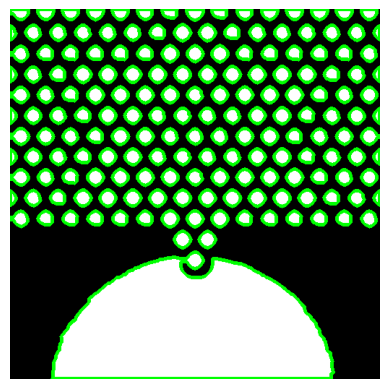

In [ ]:
contours_img_after_filtering = mask.copy()
contours_img_after_filtering = cv2.cvtColor(contours_img_after_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_after_filtering, tuple(filtered_contours), -1, (0, 255, 0), 3)

plt.imshow(contours_img_after_filtering)
plt.axis('off')

cv2.imwrite('contours.png', cv2.hconcat([contours_img_before_filtering, contours_img_after_filtering]))

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans( n_clusters=5)
df_mean_color['label'] = km.fit_predict(df_mean_color)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

def draw_segmented_objects(image, contours, label_cnt_idx, bubbles_count):
    mask = np.zeros_like(image[:, :, 0])
    cv2.drawContours(mask, [contours[i] for i in label_cnt_idx], -1, (255), -1)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    masked_image = cv2.putText(masked_image, f'{bubbles_count} bubbles', (200, 1200), cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale = 3, color = (255, 255, 255), thickness = 10, lineType = cv2.LINE_AA)
    return masked_image

(-0.5, 3071.5, 511.5, -0.5)

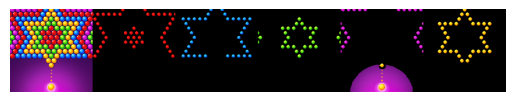

In [ ]:
bubbless_image_copy = bubbles_image.copy()
for label, df_grouped in df_mean_color.groupby('label'):
    bubbles_amount = len(df_grouped)
    masked_image = draw_segmented_objects(bubbles_image, contours, df_grouped.index, bubbles_amount)
    bubbless_image_copy = cv2.hconcat([bubbless_image_copy, masked_image])

cv2.imwrite('color_segmentation.png', bubbless_image_copy)
plt.imshow(cv2.cvtColor(bubbless_image_copy, cv2.COLOR_BGR2RGB) )
plt.axis('off')

## **Color Space Conversion**

### conver RGB to HSV

### HSV stands for hue, saturation, and value, and is also often called HSB (B for brightness). A third model, common in computer vision applications, is HSI, for hue, saturation, and intensity. However, while typically consistent, these definitions are not standardized, and any of these abbreviations might be used for any of these three or several other related cylindrical models.
In each cylinder, the angle around the central vertical axis corresponds to "hue", the distance from the axis corresponds to "saturation", and the distance along the axis corresponds to "lightness", "value" or "brightness". Note that while "hue" in HSL and HSV refers to the same attribute, their definitions of "saturation" differ dramatically

In [ ]:
def MyRGB2HSV(image):
  HSV_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
  plt.imshow(HSV_image)

In [ ]:
MyRGB2HSV(image=image2)

In [ ]:
def MyRGB2LAB(image):
  LAB_image = cv2.cvtColor(image,cv2.COLOR_BGR2LAB)
  plt.imshow(LAB_image)

In [ ]:
MyRGB2LAB(image2)

In [ ]:
def MyRGB2YCbCr(image):
  YCbCr_image = cv2.cvtColor(image,cv2.COLOR_BGR2YCrCb)
  plt.imshow(YCbCr_image)

In [ ]:
MyRGB2YCbCr(image2)